<a href="https://colab.research.google.com/github/paulbruffett/python_class/blob/master/ML_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hands-on Introduction to Machine Learning

_"[Machine Learning is a] field of study that gives computers the ability to learn without being explicitly programmed"_ -Arthur Samuel
___
###Types of Machine Learning
There are, broadly, two key types of machine learning, supervised and unsupervised.

*   Supervised machine learning consists of showing computer data and the answer and it learns from that
*   Unsupervised consists of giving the computer data and it finds patterns within the data without being explicitly told what to look for.

We will be seeing examples of supervised learning today, which is, by and large, the most frequently used.
___
###Steps in ML Process
At a high level there are basically 6 steps in a machine learning problem
1. Define the problem
2. Collect data
3. Prepare data
4. Train one of more algorithms
5. Evaluate and optimize algorithm(s)
6. Deploy

___
The dataset we're considering is a canonical dataset in machine learning, the Iris dataset.  We will attempt to classify the species of Iris by measurements from its blossoms.

In [0]:
#we start by importing sklearn and loading the dataset
from sklearn.datasets import load_iris
data = load_iris()

Features are the data attributes that we use to make a prediction, in this case features are the measurements from each of the iris species.  Features are frequently noted as 'X'.

The label is the thing we're trying to predict, in this case the species of iris.  Labels are frequently noted as 'y'.  

In [0]:
#setting our features and targets.
X = data.data
y = data.target

In [0]:
#import some more libraries to split the data and import our model type.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In order evaluate our model's accuracy, we have to hold out some of the data.  This means we make a training dataset, from which the model learns, and a validation or test dataset, which the model never sees and, thus, can be used to accurately evaluate the model's performance.

If data is not held out some algorithms, especially very powerful ones, can 'overfit' the data, memorize patterns in the data that are not true signal and, thereby, do poorly when shown real-world datasets.

In [0]:
#train test split randomly splits the dataset into a training dataset and a test, it holds out about 20% of the data for test by default
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
#we initialize the model and fit it to the training data
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
#we score the model against the test dataset
model.score(X_test,y_test)

0.9210526315789473

In [0]:
#a confusion matrix allows us to see what mistakes the model made, specifically
from sklearn.metrics import confusion_matrix
confusion_matrix(model.predict(X_test),y_test)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 13]])

#Housing Example
Let's look at another example, this time a regression problem rather than classification.  We will do a bit more data preprocessing and evaluate two different models.

In [0]:
from sklearn.datasets import load_boston
data = load_boston()

## Exploring the dataset
So it's important and frequently neglected to explore data you're performing machine learning or analytics on.  Getting a better understanding of what the columns look like, what kinds of values they contain and the distribution of the data helps you understand your algorithm.

We will use the pandas library, a very popular tabular data processing library to explore the data a bit.

In [0]:
import pandas as pd

In [0]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f25193feac8>,
      dtype=object)

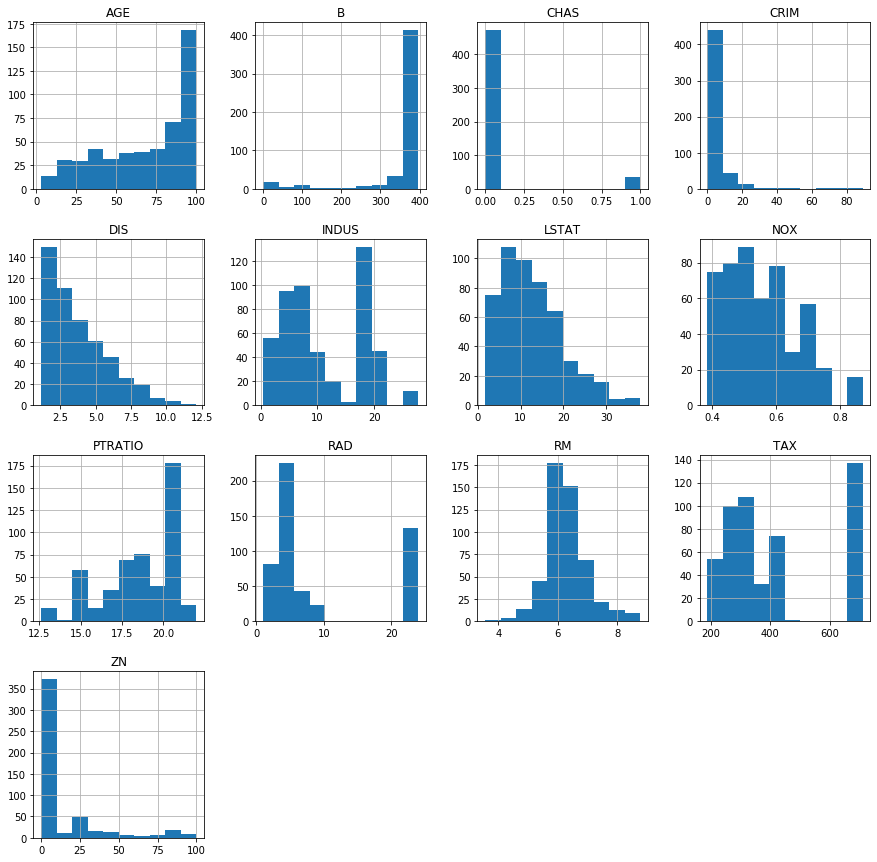

In [0]:
features = pd.DataFrame(X,columns=data.feature_names)
features.hist(figsize=(15,15))

We will scale the data, which centers the data and normalizes it around one unit of standard deviation.

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
scaler = StandardScaler()
scaler.fit(data.data)
X = scaler.transform(data.data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2518a4b588>,
      dtype=object)

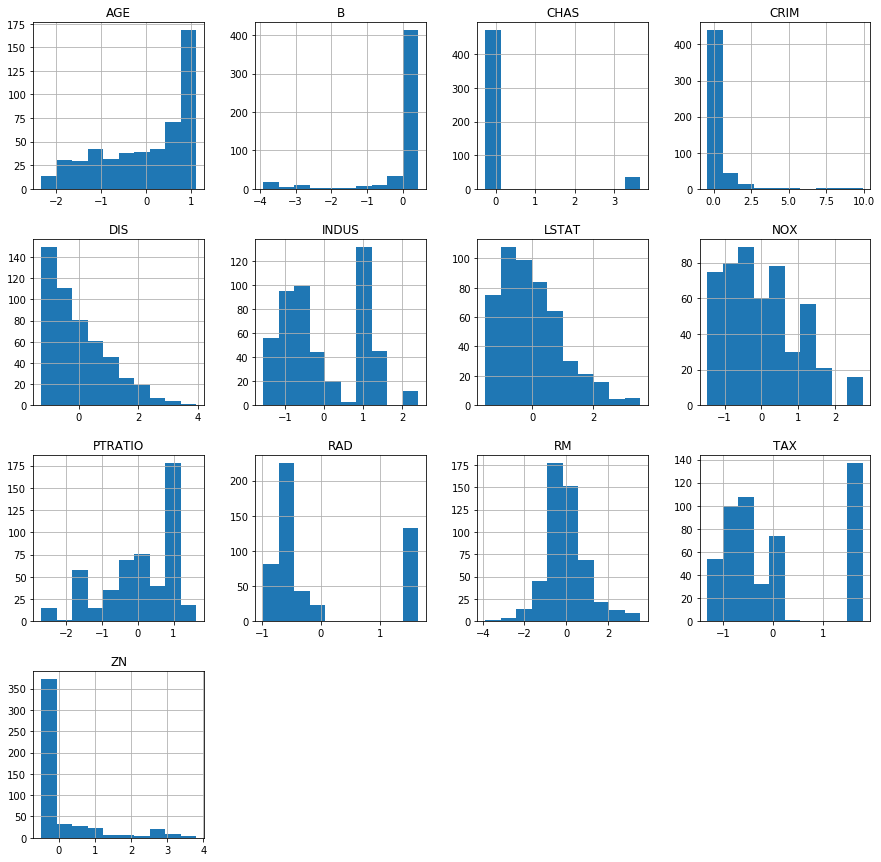

In [0]:
pd.DataFrame(X,columns=data.feature_names).hist(figsize=(15,15))

In [0]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


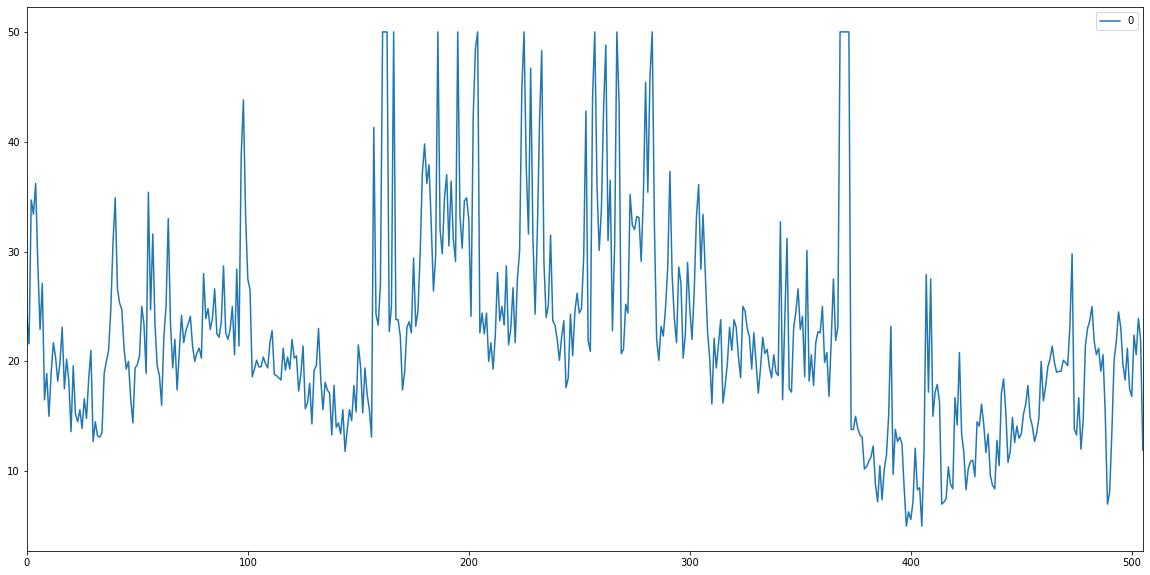

In [0]:
y=data.target

pd.DataFrame(y).plot(figsize=(20,10))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

In [0]:
linreg = LinearRegression()
decreg = DecisionTreeRegressor()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [0]:
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)

0.7672164720676055

In [0]:
decreg.fit(X_train,y_train)
decreg.score(X_test,y_test)

0.7838081070110203

In [0]:
y_linreg = linreg.predict(X_test)
y_decreg = decreg.predict(X_test)

In [0]:
predictions = pd.DataFrame(y_test.reshape(-1,1),columns=['y'])

In [0]:
predictions['y_linreg'] = y_linreg.reshape(-1,1)
predictions['y_decreg'] = y_decreg.reshape(-1,1)

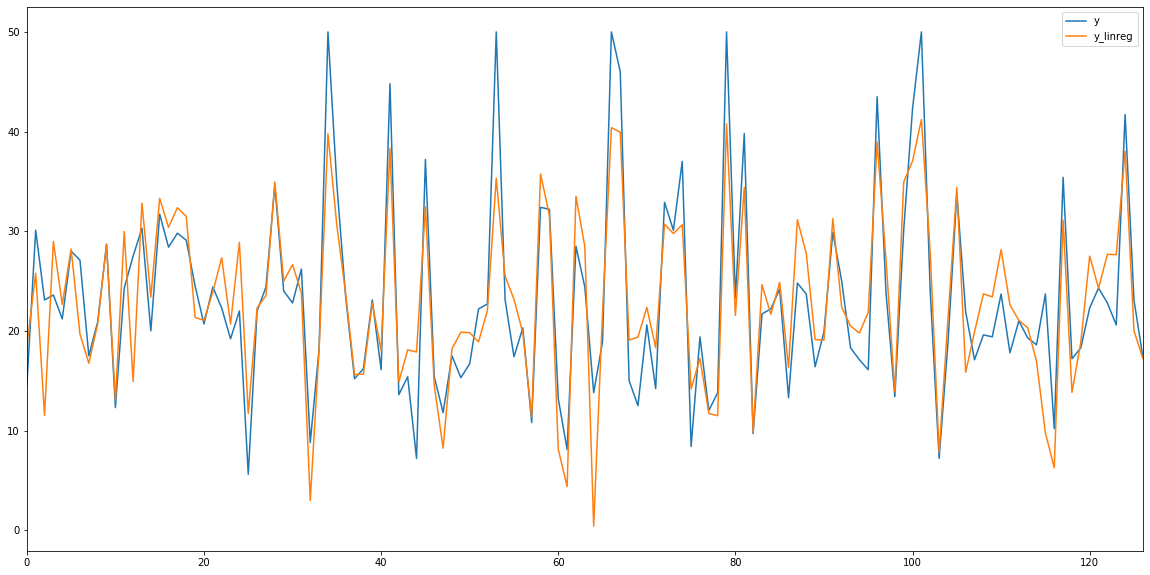

In [0]:
predictions[['y','y_linreg']].plot(figsize=(20,10))